In [1358]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.experimental import enable_iterative_imputer

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
)
import re 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [1219]:
df = pd.read_csv("phones (2).csv")

In [1220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company Name          854 non-null    object
 1   Model Name            930 non-null    object
 2   Mobile Weight         733 non-null    object
 3   RAM                   930 non-null    object
 4   Front Camera          930 non-null    object
 5   Back Camera           930 non-null    object
 6   Processor             930 non-null    object
 7   Battery Capacity      930 non-null    object
 8   Screen Size           930 non-null    object
 9   Launched Price (USA)  921 non-null    object
 10  Launched Year         930 non-null    int64 
dtypes: int64(1), object(10)
memory usage: 80.1+ KB


In [1221]:
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
0,Apple,iPhone 16 128GB,NaN,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,USD 799,2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,USD 849,2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,USD 899,2024
3,NaN,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,USD 899,2024
4,NaN,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,USD 949,2024


In [1222]:
df.tail()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
925,NaN,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,USD 280,2024
926,NaN,Pad 5G 256GB,NaN,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,USD 300,2024
927,NaN,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"USD 1,899",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,USD 1719,2024
929,Samsung,Galaxy Z Fold6 1TB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"USD 2,259",2024


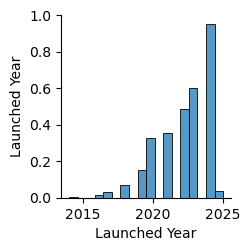

In [1223]:
sns.pairplot(df)

<Axes: >

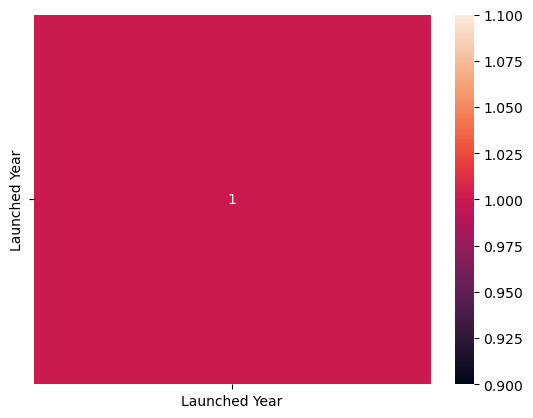

In [1224]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [1225]:
df.isnull().sum()

Company Name             76
Model Name                0
Mobile Weight           197
RAM                       0
Front Camera              0
Back Camera               0
Processor                 0
Battery Capacity          0
Screen Size               0
Launched Price (USA)      9
Launched Year             0
dtype: int64

In [1226]:
df["RAM"].unique()

array(['6GB', '8GB', '4GB', '3GB', '12GB', '2GB', '1.5GB', '16GB', '10GB',
       '1GB', '8GB / 12GB'], dtype=object)

In [1227]:
df["Company Name"].value_counts()

Company Name
Oppo        115
Apple        92
Honor        84
Samsung      82
Vivo         79
Realme       65
Motorola     56
Infinix      52
OnePlus      47
Huawei       38
Tecno        35
POCO         29
Xiaomi       26
Google       19
Lenovo       14
Nokia        10
Sony          9
iQOO          2
Name: count, dtype: int64

In [1228]:
df.tail()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
925,NaN,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,USD 280,2024
926,NaN,Pad 5G 256GB,NaN,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,USD 300,2024
927,NaN,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"USD 1,899",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,USD 1719,2024
929,Samsung,Galaxy Z Fold6 1TB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"USD 2,259",2024


In [1229]:
df["Company Name"].value_counts()

Company Name
Oppo        115
Apple        92
Honor        84
Samsung      82
Vivo         79
Realme       65
Motorola     56
Infinix      52
OnePlus      47
Huawei       38
Tecno        35
POCO         29
Xiaomi       26
Google       19
Lenovo       14
Nokia        10
Sony          9
iQOO          2
Name: count, dtype: int64

In [1230]:
# Premnogu vrednosti ima za enkodiranje pa bi mozelo drop 

In [1231]:
imputer = OrdinalEncoder(categories="auto",handle_unknown="use_encoded_value",unknown_value=np.nan)

In [1232]:
df[["Company Name"]] = imputer.fit_transform(df[["Company Name"]])

In [1233]:
df.isnull().sum()

Company Name             76
Model Name                0
Mobile Weight           197
RAM                       0
Front Camera              0
Back Camera               0
Processor                 0
Battery Capacity          0
Screen Size               0
Launched Price (USA)      9
Launched Year             0
dtype: int64

In [1234]:
df.dropna(subset=["Launched Price (USA)"],inplace=True)

In [1235]:
df.isnull().sum()

Company Name             76
Model Name                0
Mobile Weight           196
RAM                       0
Front Camera              0
Back Camera               0
Processor                 0
Battery Capacity          0
Screen Size               0
Launched Price (USA)      0
Launched Year             0
dtype: int64

In [1236]:
df.tail()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
925,NaN,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,USD 280,2024
926,NaN,Pad 5G 256GB,NaN,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,USD 300,2024
927,NaN,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"USD 1,899",2024
928,12.0,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,USD 1719,2024
929,12.0,Galaxy Z Fold6 1TB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"USD 2,259",2024


In [1237]:
df["Model Name"].value_counts()

Model Name
Pad 2 256GB           3
Pad 128GB             3
A3 128GB              2
K9 Pro 5G 128GB       2
K7 5G 128GB           2
                     ..
V27 Pro 256GB         1
V25 Pro 128GB         1
V25 Pro 256GB         1
X90 Pro 256GB         1
Galaxy Z Fold6 1TB    1
Name: count, Length: 899, dtype: int64

In [1238]:
df.drop(columns=["Model Name"],inplace=True)

In [1239]:
df.tail()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
925,NaN,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,USD 280,2024
926,NaN,NaN,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,USD 300,2024
927,NaN,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"USD 1,899",2024
928,12.0,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,USD 1719,2024
929,12.0,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"USD 2,259",2024


In [1240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 921 entries, 0 to 929
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company Name          845 non-null    float64
 1   Mobile Weight         725 non-null    object 
 2   RAM                   921 non-null    object 
 3   Front Camera          921 non-null    object 
 4   Back Camera           921 non-null    object 
 5   Processor             921 non-null    object 
 6   Battery Capacity      921 non-null    object 
 7   Screen Size           921 non-null    object 
 8   Launched Price (USA)  921 non-null    object 
 9   Launched Year         921 non-null    int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 79.1+ KB


In [1241]:
df["Mobile Weight"]

0       NaN
1      174g
2      174g
3      203g
4      203g
       ... 
925    571g
926     NaN
927    239g
928    239g
929    239g
Name: Mobile Weight, Length: 921, dtype: object

In [1242]:
df.tail()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
925,NaN,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,USD 280,2024
926,NaN,NaN,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,USD 300,2024
927,NaN,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"USD 1,899",2024
928,12.0,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,USD 1719,2024
929,12.0,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"USD 2,259",2024


In [1243]:
df.isnull().sum()

Company Name             76
Mobile Weight           196
RAM                       0
Front Camera              0
Back Camera               0
Processor                 0
Battery Capacity          0
Screen Size               0
Launched Price (USA)      0
Launched Year             0
dtype: int64

In [1244]:
text = "571g"

In [1245]:
brojka = re.findall(r"\d+",text)[0]
brojka

'571'

In [1246]:
text = "Prati mi email na ely.satellite@phonestore.com ili pak ilija_trajkovski@studebnts.finki.com or ana@mkd.com"

In [1247]:
emails = re.findall(r"[A-Za-z0-9._]+@[A-Za-z0-9._]+\.[A-Za-z]+",text)

In [1248]:
emails

['ely.satellite@phonestore.com',
 'ilija_trajkovski@studebnts.finki.com',
 'ana@mkd.com']

In [1249]:
df["Mobile Weight"] = df["Mobile Weight"].apply(lambda text: re.findall(r"\d+",text)[0] if not pd.isna(text) else np.nan)

In [1250]:
df["Mobile Weight"] = df["Mobile Weight"].astype("Int64")

In [1251]:
df.tail()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
925,NaN,571,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,USD 280,2024
926,NaN,<NA>,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,USD 300,2024
927,NaN,239,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"USD 1,899",2024
928,12.0,239,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,USD 1719,2024
929,12.0,239,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"USD 2,259",2024


In [1252]:
df["RAM"] = df["RAM"].apply(lambda text: re.findall(r"\d+",text)[0] if not pd.isna(text) else np.nan)

In [1253]:
df["RAM"] = df["RAM"].astype(int)

In [1254]:
text = "10MP, 4MP (UDC)"

In [1255]:
df.tail(3)

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
927,NaN,239,12,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"USD 1,899",2024
928,12.0,239,12,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,USD 1719,2024
929,12.0,239,12,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"USD 2,259",2024


In [1256]:
df["Front Camera"] = df["Front Camera"].apply(lambda text: re.findall(r"\d+",text)[0] if not pd.isna(text) else np.nan)

In [1257]:
df["Front Camera"] = df["Front Camera"].astype(int)

In [1258]:
df.head(2)

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
0,0.0,<NA>,6,12,48MP,A17 Bionic,"3,600mAh",6.1 inches,USD 799,2024
1,0.0,174,6,12,48MP,A17 Bionic,"3,600mAh",6.1 inches,USD 849,2024


In [1259]:
df["Back Camera"] = df["Back Camera"].apply(lambda text: re.findall(r"\d+",text)[0] if not pd.isna(text) else np.nan)

In [1260]:
df["Back Camera"] = df["Back Camera"].astype(int)

In [1261]:
df.head()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
0,0.0,<NA>,6,12,48,A17 Bionic,"3,600mAh",6.1 inches,USD 799,2024
1,0.0,174,6,12,48,A17 Bionic,"3,600mAh",6.1 inches,USD 849,2024
2,0.0,174,6,12,48,A17 Bionic,"3,600mAh",6.1 inches,USD 899,2024
3,NaN,203,6,12,48,A17 Bionic,"4,200mAh",6.7 inches,USD 899,2024
4,NaN,203,6,12,48,A17 Bionic,"4,200mAh",6.7 inches,USD 949,2024


In [1262]:
df["Processor"].value_counts()

Processor
Snapdragon 8 Gen 2         28
MediaTek Dimensity 810     22
MediaTek Helio G99         21
Snapdragon 8 Gen 3         19
MediaTek Helio G85         19
                           ..
Snapdragon 439              1
Snapdragon 652              1
MediaTek Helio G35          1
MediaTek MT6592             1
MediaTek Dimensity 8400     1
Name: count, Length: 216, dtype: int64

In [1263]:
# Premnogu vrednosti -> DROP!

In [1264]:
df.drop(columns=["Processor"],inplace=True)

In [1265]:
df["Battery Capacity"].unique()

array(['3,600mAh', '4,200mAh', '4,400mAh', '4,500mAh', '3,200mAh',
       '4,300mAh', '4,325mAh', '2,438mAh', '3,240mAh', '3,095mAh',
       '4,352mAh', '2,227mAh', '2,815mAh', '3,687mAh', '3,110mAh',
       '3,046mAh', '3,969mAh', '2,716mAh', '2,658mAh', '3,174mAh',
       '2,942mAh', '7,608mAh', '8,612mAh', '5,124mAh', '7,812mAh',
       '9,720mAh', '10,307mAh', '5000mAh', '4800mAh', '4000mAh',
       '4700mAh', '3900mAh', '4500mAh', '3800mAh', '4400mAh', '3700mAh',
       '6000mAh', '4300mAh', '3500mAh', '4050mAh', '3000mAh', '3600mAh',
       '3300mAh', '2600mAh', '10090mAh', '8400mAh', '8000mAh', '11200mAh',
       '7040mAh', '5100mAh', '5050mAh', '7600mAh', '4510mAh', '4115mAh',
       '4085mAh', '9510mAh', '11000mAh', '5700mAh', '4100mAh', '3315mAh',
       '3260mAh', '2300mAh', '3055mAh', '4030mAh', '2000mAh', '3200mAh',
       '4200mAh', '4450mAh', '4600mAh', '4830mAh', '4870mAh', '8040mAh',
       '4805mAh', '5800mAh', '5600mAh', '6400mAh', '8360mAh', '4520mAh',
       '5,000

In [1266]:
text = "10,500mAh i 5000mAh"

In [1267]:
brojka = re.findall(r"\d+\,?\d+",text)
brojka

['10,500', '5000']

In [1268]:
df["Battery Capacity"].unique()

array(['3,600mAh', '4,200mAh', '4,400mAh', '4,500mAh', '3,200mAh',
       '4,300mAh', '4,325mAh', '2,438mAh', '3,240mAh', '3,095mAh',
       '4,352mAh', '2,227mAh', '2,815mAh', '3,687mAh', '3,110mAh',
       '3,046mAh', '3,969mAh', '2,716mAh', '2,658mAh', '3,174mAh',
       '2,942mAh', '7,608mAh', '8,612mAh', '5,124mAh', '7,812mAh',
       '9,720mAh', '10,307mAh', '5000mAh', '4800mAh', '4000mAh',
       '4700mAh', '3900mAh', '4500mAh', '3800mAh', '4400mAh', '3700mAh',
       '6000mAh', '4300mAh', '3500mAh', '4050mAh', '3000mAh', '3600mAh',
       '3300mAh', '2600mAh', '10090mAh', '8400mAh', '8000mAh', '11200mAh',
       '7040mAh', '5100mAh', '5050mAh', '7600mAh', '4510mAh', '4115mAh',
       '4085mAh', '9510mAh', '11000mAh', '5700mAh', '4100mAh', '3315mAh',
       '3260mAh', '2300mAh', '3055mAh', '4030mAh', '2000mAh', '3200mAh',
       '4200mAh', '4450mAh', '4600mAh', '4830mAh', '4870mAh', '8040mAh',
       '4805mAh', '5800mAh', '5600mAh', '6400mAh', '8360mAh', '4520mAh',
       '5,000

In [1269]:
df["Battery Capacity"] = df["Battery Capacity"].apply(lambda text: re.findall(r"\d+\,?\d+",text)[0] if not pd.isna(text) else np.nan)

In [1270]:
df.tail()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
925,NaN,571,8,8,8,"10,000",12.1 inches,USD 280,2024
926,NaN,<NA>,8,8,8,"10,000",12.1 inches,USD 300,2024
927,NaN,239,12,10,50,4400,7.6 inches,"USD 1,899",2024
928,12.0,239,12,10,50,4400,7.6 inches,USD 1719,2024
929,12.0,239,12,10,50,4400,7.6 inches,"USD 2,259",2024


In [1271]:
# MORA DA IMA .str !!!!!!
# df["Battery Capacity"] = df["Battery Capacity"].str.replace(",","")

In [1272]:
df.head()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
0,0.0,<NA>,6,12,48,"3,600",6.1 inches,USD 799,2024
1,0.0,174,6,12,48,"3,600",6.1 inches,USD 849,2024
2,0.0,174,6,12,48,"3,600",6.1 inches,USD 899,2024
3,NaN,203,6,12,48,"4,200",6.7 inches,USD 899,2024
4,NaN,203,6,12,48,"4,200",6.7 inches,USD 949,2024


In [1273]:
df["Battery Capacity"] = df["Battery Capacity"].apply(lambda text: text.replace(",","") if not pd.isna(text) else np.nan)

In [1274]:
df["Battery Capacity"] = df["Battery Capacity"].astype(int)

In [1275]:
df.head()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
0,0.0,<NA>,6,12,48,3600,6.1 inches,USD 799,2024
1,0.0,174,6,12,48,3600,6.1 inches,USD 849,2024
2,0.0,174,6,12,48,3600,6.1 inches,USD 899,2024
3,NaN,203,6,12,48,4200,6.7 inches,USD 899,2024
4,NaN,203,6,12,48,4200,6.7 inches,USD 949,2024


In [1276]:
df.head(3)

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
0,0.0,<NA>,6,12,48,3600,6.1 inches,USD 799,2024
1,0.0,174,6,12,48,3600,6.1 inches,USD 849,2024
2,0.0,174,6,12,48,3600,6.1 inches,USD 899,2024


In [1277]:
df["Battery Capacity"].unique()

array([ 3600,  4200,  4400,  4500,  3200,  4300,  4325,  2438,  3240,
        3095,  4352,  2227,  2815,  3687,  3110,  3046,  3969,  2716,
        2658,  3174,  2942,  7608,  8612,  5124,  7812,  9720, 10307,
        5000,  4800,  4000,  4700,  3900,  3800,  3700,  6000,  3500,
        4050,  3000,  3300,  2600, 10090,  8400,  8000, 11200,  7040,
        5100,  5050,  7600,  4510,  4115,  4085,  9510, 11000,  5700,
        4100,  3315,  3260,  2300,  3055,  4030,  2000,  4450,  4600,
        4830,  4870,  8040,  4805,  5800,  5600,  6400,  8360,  4520,
        4350,  4025,  4040,  6500,  5500,  5200,  7100,  8340,  7200,
        6100,  5400,  4610,  5110,  3350,  4310,  4020,  4360,  4460,
        4815,  4750,  4900,  8200, 10100,  2800,  3140,  3885,  4080,
        4680,  4614,  5003,  4410,  4355,  4575,  4385,  5250,  7500,
        7000,  9000,  5300,  3750,  5450,  5550,  7250,  8500,  8300,
       10000, 10500,  8850,  5160,  5065])

In [1278]:
text = "6.36 inches, 6 inches"

In [1279]:
brojka = re.findall(r"\d+(?:\.?\d+)?",text)
brojka

['6.36', '6']

In [1280]:
df.head(2)

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
0,0.0,<NA>,6,12,48,3600,6.1 inches,USD 799,2024
1,0.0,174,6,12,48,3600,6.1 inches,USD 849,2024


In [1281]:
df["Screen Size"].unique()

array(['6.1 inches', '6.7 inches', '5.4 inches', '5.8 inches',
       '6.5 inches', '10.9 inches', '10.2 inches', '7.9 inches',
       '11 inches', '12.9 inches', '13 inches', '6.8 inches',
       '6.6 inches', '7.6 inches', '6.4 inches', '6.9 inches',
       '6.3 inches', '5.3 inches', '6.0 inches', '5.5 inches',
       '5.7 inches', '5.2 inches', '12.4 inches', '14.6 inches',
       '8.7 inches', '10.5 inches', '8 inches', '10.1 inches',
       '6.74 inches', '6.72 inches', '7.8 inches', '6.55 inches',
       '6.43 inches', '6.49 inches', '6.52 inches', '6.78 inches',
       '6.59 inches', '6.44 inches', '6.41 inches', '6.01 inches',
       '6.67 inches', '6.28 inches', '11.61 inches', '6.31 inches',
       '6.58 inches', '6.38 inches', '6.56 inches', '5.88 inches',
       '6.22 inches', '5.0 inches', '6.51 inches', '6.35 inches',
       '6.53 inches', '6.39 inches', '6.47 inches', '10.4 inches',
       '12.3 inches', '7.82 inches', '6.83 inches', '11.6 inches',
       '12.1 inches',

In [1282]:
df.head()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
0,0.0,<NA>,6,12,48,3600,6.1 inches,USD 799,2024
1,0.0,174,6,12,48,3600,6.1 inches,USD 849,2024
2,0.0,174,6,12,48,3600,6.1 inches,USD 899,2024
3,NaN,203,6,12,48,4200,6.7 inches,USD 899,2024
4,NaN,203,6,12,48,4200,6.7 inches,USD 949,2024


In [1283]:
df["Screen Size"] = df["Screen Size"].apply(lambda text: re.findall(r"\d+(?:\.?\d+)?",text)[0] if not pd.isna(text) else np.nan)

In [1284]:
df["Screen Size"] = df["Screen Size"].astype(float)

In [1285]:
df.head()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
0,0.0,<NA>,6,12,48,3600,6.1,USD 799,2024
1,0.0,174,6,12,48,3600,6.1,USD 849,2024
2,0.0,174,6,12,48,3600,6.1,USD 899,2024
3,NaN,203,6,12,48,4200,6.7,USD 899,2024
4,NaN,203,6,12,48,4200,6.7,USD 949,2024


In [1286]:
df["Launched Price (USA)"].value_counts()

Launched Price (USA)
USD 899       43
USD 499       43
USD 1,099     43
USD 299       42
USD 399       41
              ..
USD 399.00     1
USD 374.90     1
USD 790.77     1
USD 634.99     1
USD 2,259      1
Name: count, Length: 106, dtype: int64

In [1287]:
text = "USD 2,259 or USD 790.775 or USD 499 or 41.2 or 4 or 366,950"

In [1288]:
dolari = re.findall(r"\d+(?:\,?\.?\d+)?",text)

In [1289]:
dolari

['2,259', '790.775', '499', '41.2', '4', '366,950']

In [1290]:
df.tail(5)

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
925,NaN,571,8,8,8,10000,12.1,USD 280,2024
926,NaN,<NA>,8,8,8,10000,12.1,USD 300,2024
927,NaN,239,12,10,50,4400,7.6,"USD 1,899",2024
928,12.0,239,12,10,50,4400,7.6,USD 1719,2024
929,12.0,239,12,10,50,4400,7.6,"USD 2,259",2024


In [1291]:
df["Launched Price (USA)"] = df["Launched Price (USA)"].apply(lambda text: re.findall(r"\d+(?:\,?\.?\d+)?",text)[0] if not pd.isna(text) else np.nan)

In [1292]:
df.tail()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
925,NaN,571,8,8,8,10000,12.1,280,2024
926,NaN,<NA>,8,8,8,10000,12.1,300,2024
927,NaN,239,12,10,50,4400,7.6,"1,899",2024
928,12.0,239,12,10,50,4400,7.6,1719,2024
929,12.0,239,12,10,50,4400,7.6,"2,259",2024


In [1293]:
df["Launched Price (USA)"].unique()

array(['799', '849', '899', '949', '999', '1,049', '1,099', '1,199',
       '1,299', '1,399', '699', '1,249', '749', '599', '329', '429',
       '399', '499', '1,599', '1,799', '1,899', '449', '349', '299',
       '249', '199', '179', '169', '129', '1,499', '549', '229', '149',
       '649', '99', '219', '139', '159', '269', '319', '239', '279',
       '189', '259', '470', '500', '380', '400', '420', '360', '340',
       '320', '270', '290', '250', '220', '240', '300', '200', '260',
       '180', '160', '210', '230', '130', '170', '190', '150', '440',
       '330', '350', '280', '310', '634.99', '790.77', '374.90', '399.00',
       '349.00', '379.00', '299.00', '329.00', '279.00', '309.00',
       '249.00', '199.00', '229.00', '479', '370', '450', '2,699',
       '2,499', '2,599', '2,799', '529', '729', '119', '1,699', '396,22',
       '877', '89', '289', '379', '109', '79', '1719', '2,259'],
      dtype=object)

In [1294]:
# Ako ima zapirka , znaci deka deka treba da se trgne za da se dobie celiot broj, tockite . ostanuvaat 

In [1295]:
df["Launched Price (USA)"] = df["Launched Price (USA)"].str.replace("396,22","396.22")

In [1296]:
df["Launched Price (USA)"].unique()

array(['799', '849', '899', '949', '999', '1,049', '1,099', '1,199',
       '1,299', '1,399', '699', '1,249', '749', '599', '329', '429',
       '399', '499', '1,599', '1,799', '1,899', '449', '349', '299',
       '249', '199', '179', '169', '129', '1,499', '549', '229', '149',
       '649', '99', '219', '139', '159', '269', '319', '239', '279',
       '189', '259', '470', '500', '380', '400', '420', '360', '340',
       '320', '270', '290', '250', '220', '240', '300', '200', '260',
       '180', '160', '210', '230', '130', '170', '190', '150', '440',
       '330', '350', '280', '310', '634.99', '790.77', '374.90', '399.00',
       '349.00', '379.00', '299.00', '329.00', '279.00', '309.00',
       '249.00', '199.00', '229.00', '479', '370', '450', '2,699',
       '2,499', '2,599', '2,799', '529', '729', '119', '1,699', '396.22',
       '877', '89', '289', '379', '109', '79', '1719', '2,259'],
      dtype=object)

In [1297]:
df["Launched Price (USA)"] = df["Launched Price (USA)"].apply(lambda text: text.replace(",","") if not pd.isna(text) else np.nan)

In [1298]:
df["Launched Price (USA)"].unique()

array(['799', '849', '899', '949', '999', '1049', '1099', '1199', '1299',
       '1399', '699', '1249', '749', '599', '329', '429', '399', '499',
       '1599', '1799', '1899', '449', '349', '299', '249', '199', '179',
       '169', '129', '1499', '549', '229', '149', '649', '99', '219',
       '139', '159', '269', '319', '239', '279', '189', '259', '470',
       '500', '380', '400', '420', '360', '340', '320', '270', '290',
       '250', '220', '240', '300', '200', '260', '180', '160', '210',
       '230', '130', '170', '190', '150', '440', '330', '350', '280',
       '310', '634.99', '790.77', '374.90', '399.00', '349.00', '379.00',
       '299.00', '329.00', '279.00', '309.00', '249.00', '199.00',
       '229.00', '479', '370', '450', '2699', '2499', '2599', '2799',
       '529', '729', '119', '1699', '396.22', '877', '89', '289', '379',
       '109', '79', '1719', '2259'], dtype=object)

In [1299]:
df["Launched Price (USA)"] = df["Launched Price (USA)"].astype(float)

In [1300]:
df.head()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
0,0.0,<NA>,6,12,48,3600,6.1,799.0,2024
1,0.0,174,6,12,48,3600,6.1,849.0,2024
2,0.0,174,6,12,48,3600,6.1,899.0,2024
3,NaN,203,6,12,48,4200,6.7,899.0,2024
4,NaN,203,6,12,48,4200,6.7,949.0,2024


In [1301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 921 entries, 0 to 929
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company Name          845 non-null    float64
 1   Mobile Weight         725 non-null    Int64  
 2   RAM                   921 non-null    int32  
 3   Front Camera          921 non-null    int32  
 4   Back Camera           921 non-null    int32  
 5   Battery Capacity      921 non-null    int32  
 6   Screen Size           921 non-null    float64
 7   Launched Price (USA)  921 non-null    float64
 8   Launched Year         921 non-null    int64  
dtypes: Int64(1), float64(3), int32(4), int64(1)
memory usage: 58.5 KB


In [1302]:
df.head()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
0,0.0,<NA>,6,12,48,3600,6.1,799.0,2024
1,0.0,174,6,12,48,3600,6.1,849.0,2024
2,0.0,174,6,12,48,3600,6.1,899.0,2024
3,NaN,203,6,12,48,4200,6.7,899.0,2024
4,NaN,203,6,12,48,4200,6.7,949.0,2024


In [1303]:
df.isnull().sum()

Company Name             76
Mobile Weight           196
RAM                       0
Front Camera              0
Back Camera               0
Battery Capacity          0
Screen Size               0
Launched Price (USA)      0
Launched Year             0
dtype: int64

<Axes: >

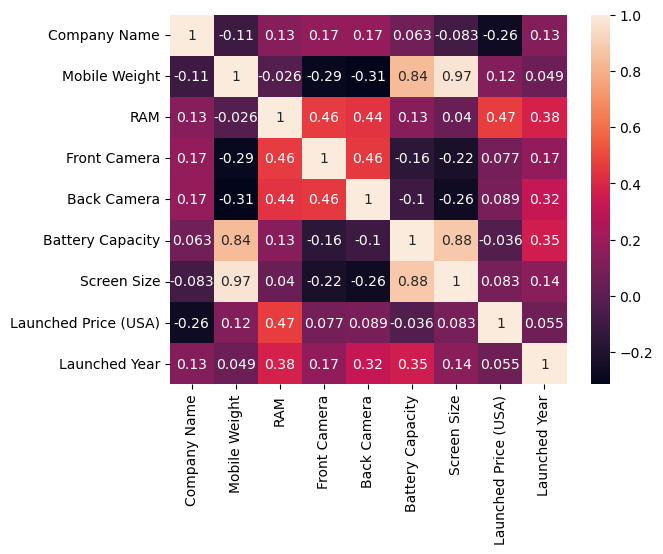

In [1304]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [1305]:
df.isnull().sum()

Company Name             76
Mobile Weight           196
RAM                       0
Front Camera              0
Back Camera               0
Battery Capacity          0
Screen Size               0
Launched Price (USA)      0
Launched Year             0
dtype: int64

In [1306]:
df["Company Name"].value_counts()

Company Name
9.0     115
0.0      91
2.0      83
12.0     80
15.0     78
11.0     65
6.0      55
4.0      52
8.0      47
3.0      38
14.0     35
10.0     28
16.0     25
1.0      18
5.0      14
7.0      10
13.0      9
17.0      2
Name: count, dtype: int64

In [1307]:
imputer = SimpleImputer(strategy="most_frequent")

In [1308]:
df[["Company Name"]] = imputer.fit_transform(df[["Company Name"]])

In [1309]:
df.isnull().sum()

Company Name              0
Mobile Weight           196
RAM                       0
Front Camera              0
Back Camera               0
Battery Capacity          0
Screen Size               0
Launched Price (USA)      0
Launched Year             0
dtype: int64

<Axes: >

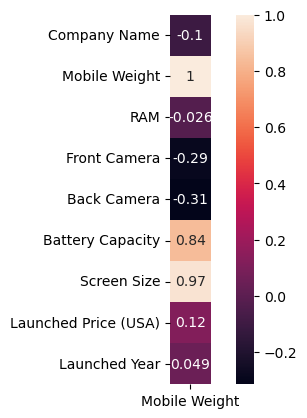

In [1310]:
sns.heatmap(df.corr()[["Mobile Weight"]],annot=True,square=True)

In [1311]:
imputer = IterativeImputer()

In [1312]:
df[["Mobile Weight","Screen Size","Battery Capacity"]] = imputer.fit_transform(df[["Mobile Weight","Screen Size","Battery Capacity"]])

In [1313]:
df.isnull().sum()

Company Name            0
Mobile Weight           0
RAM                     0
Front Camera            0
Back Camera             0
Battery Capacity        0
Screen Size             0
Launched Price (USA)    0
Launched Year           0
dtype: int64

In [1314]:
df.head()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
0,0.0,164.445926,6,12,48,3600.0,6.1,799.0,2024
1,0.0,174.000000,6,12,48,3600.0,6.1,849.0,2024
2,0.0,174.000000,6,12,48,3600.0,6.1,899.0,2024
3,9.0,203.000000,6,12,48,4200.0,6.7,899.0,2024
4,9.0,203.000000,6,12,48,4200.0,6.7,949.0,2024


In [1315]:
df["Mobile Weight"] = df["Mobile Weight"].astype(int)

In [1316]:
df.head()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
0,0.0,164,6,12,48,3600.0,6.1,799.0,2024
1,0.0,174,6,12,48,3600.0,6.1,849.0,2024
2,0.0,174,6,12,48,3600.0,6.1,899.0,2024
3,9.0,203,6,12,48,4200.0,6.7,899.0,2024
4,9.0,203,6,12,48,4200.0,6.7,949.0,2024


In [1317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 921 entries, 0 to 929
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company Name          921 non-null    float64
 1   Mobile Weight         921 non-null    int32  
 2   RAM                   921 non-null    int32  
 3   Front Camera          921 non-null    int32  
 4   Back Camera           921 non-null    int32  
 5   Battery Capacity      921 non-null    float64
 6   Screen Size           921 non-null    float64
 7   Launched Price (USA)  921 non-null    float64
 8   Launched Year         921 non-null    int64  
dtypes: float64(4), int32(4), int64(1)
memory usage: 57.6 KB


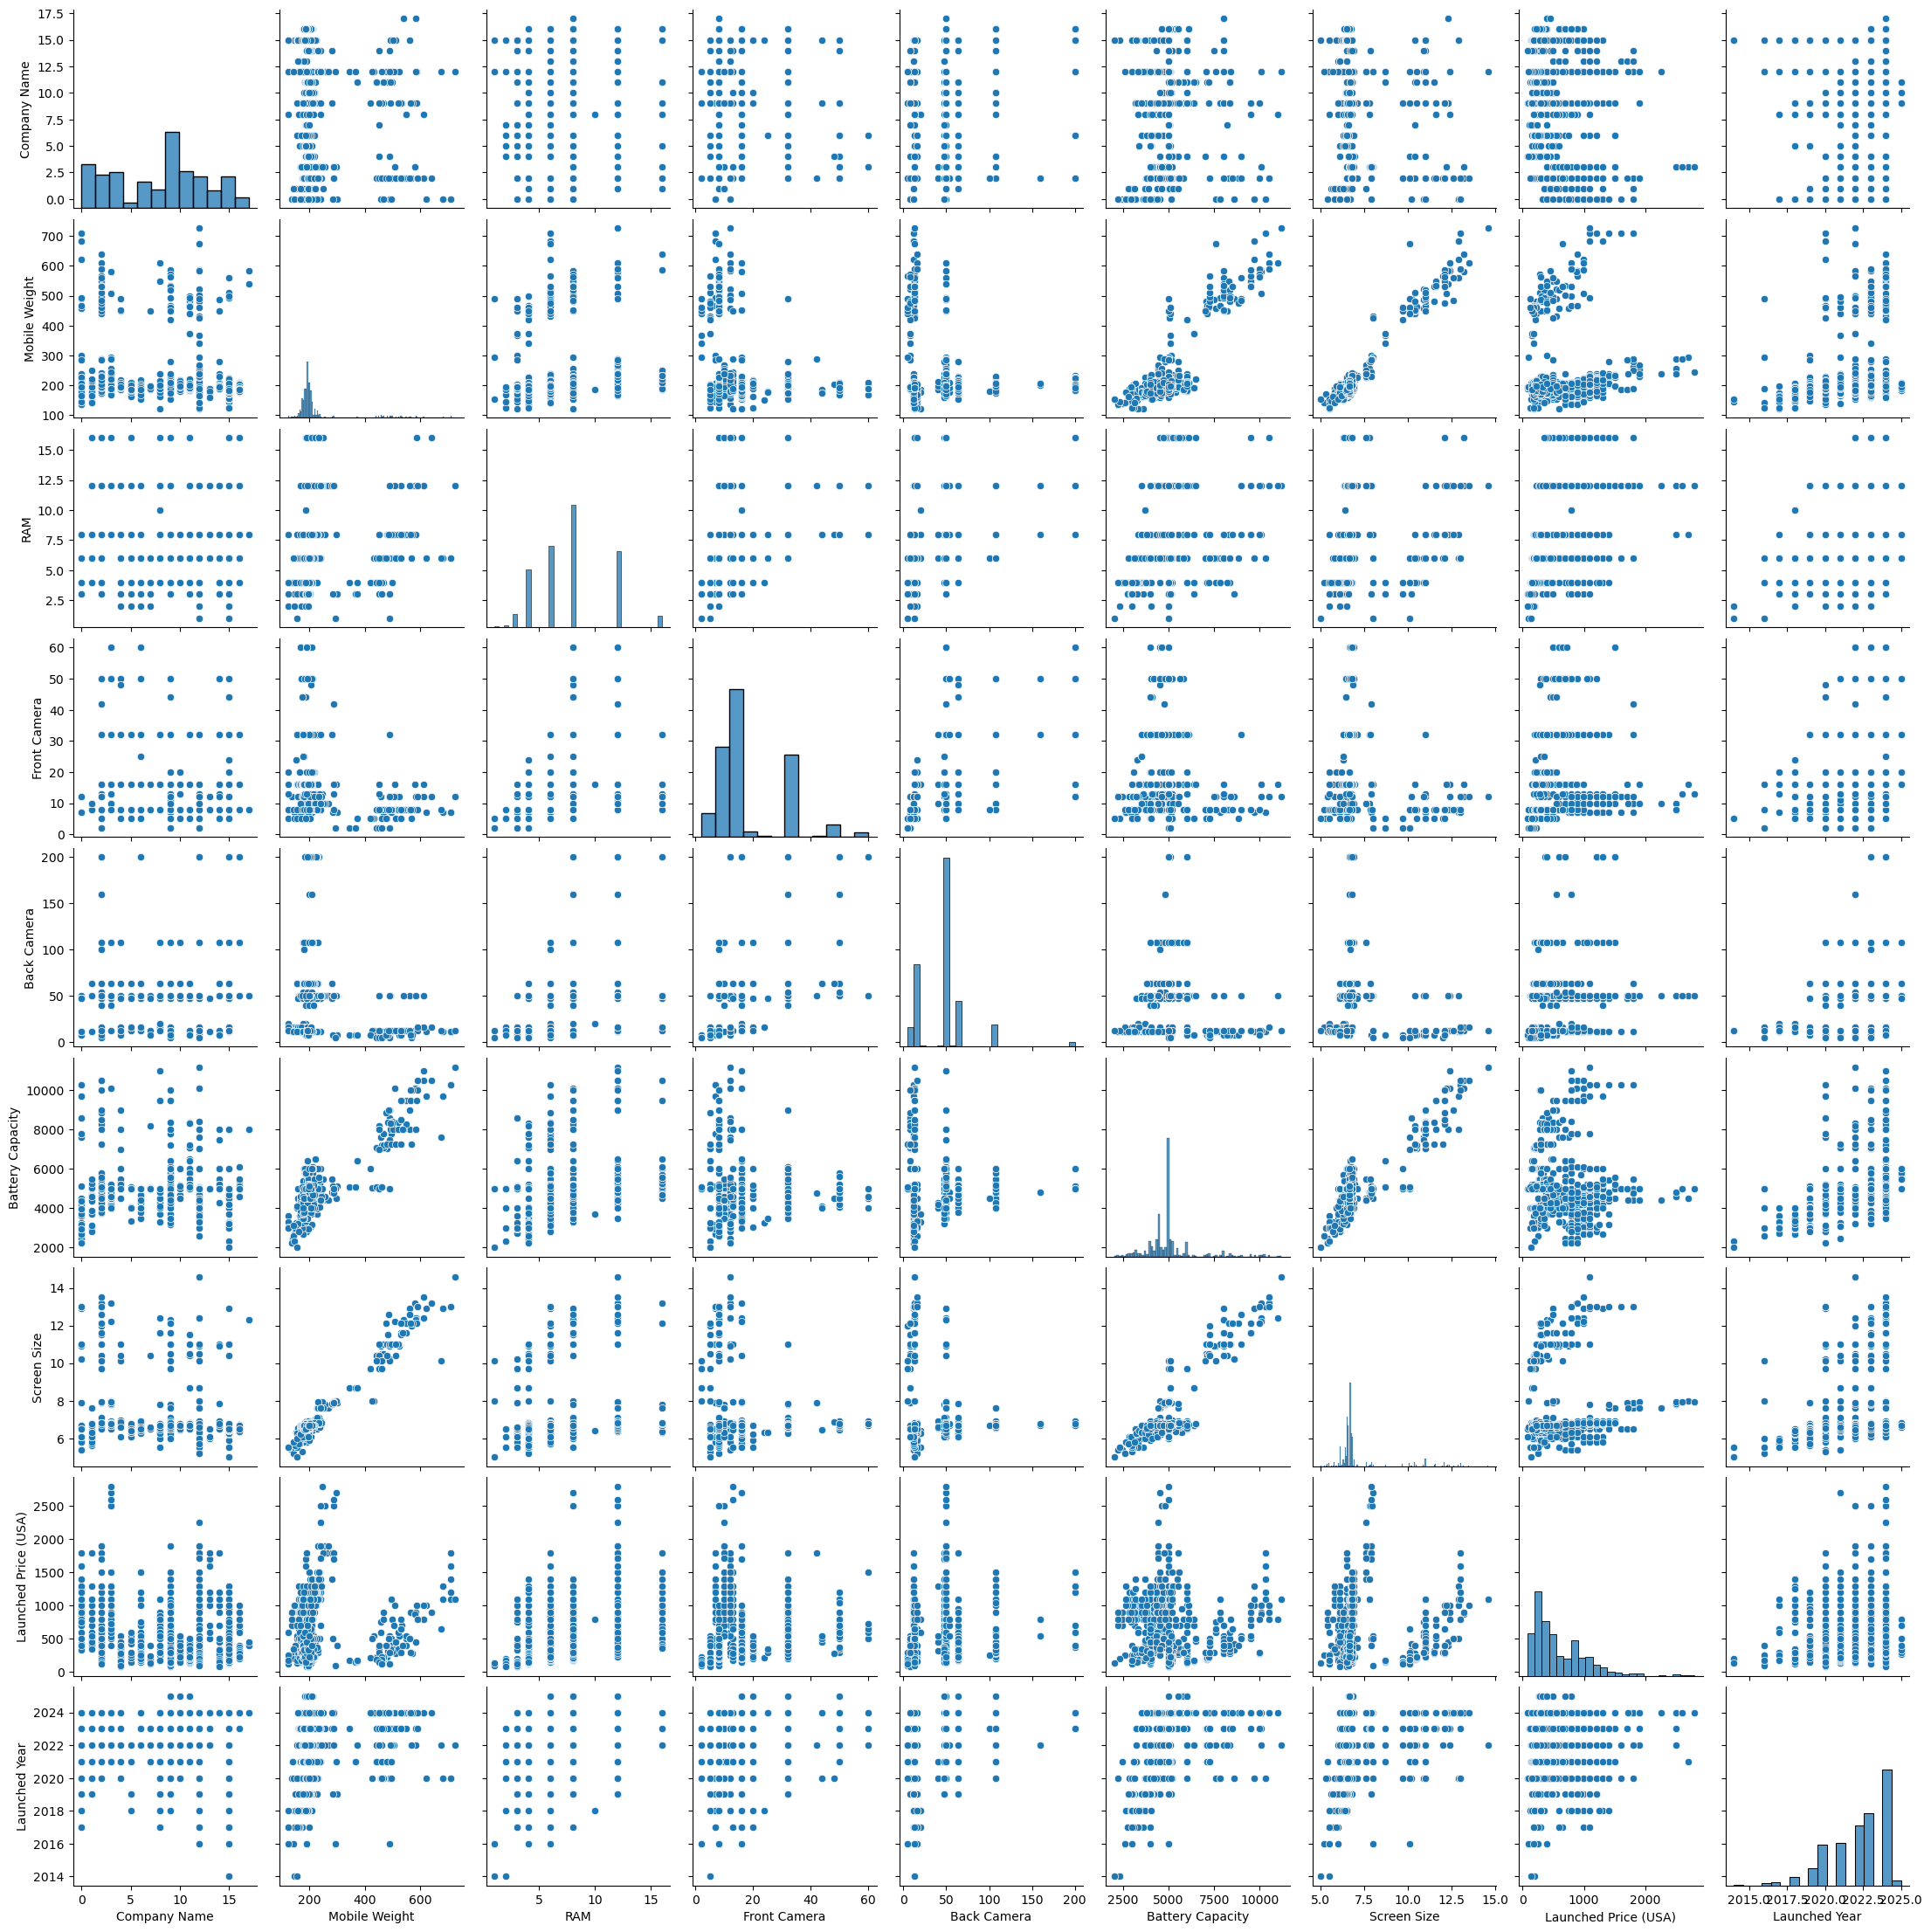

In [1324]:
sns.pairplot(df)

In [1318]:
x,y = df.drop(columns=["Launched Price (USA)"]), df["Launched Price (USA)"]

In [1323]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2)

In [1325]:
# Treba nelinearen model poso se nelinearni vrski, ali probuvame Linear Regression kako baseline -?

In [1326]:
scaler = MinMaxScaler()

In [1327]:
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [1328]:
model1 = LinearRegression()

In [1329]:
model1.fit(train_x,train_y)

LinearRegression()

In [1331]:
y_pred = model1.predict(test_x)

In [1332]:
print(f"MSE: {mean_squared_error(test_y,y_pred)}")
print(f"RMSE: {root_mean_squared_error(test_y,y_pred)}")
print(f"MAE: {mean_absolute_error(test_y,y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y,y_pred)}")
print(f"r2 score: {r2_score(test_y,y_pred)}")

MSE: 109999.69378768072
RMSE: 331.66201740277813
MAE: 251.52116675423963
MAPE: 0.6303830572326582
r2 score: 0.38034401224164216


In [1333]:
# ocekuvano! 

In [1338]:
model2 = KNeighborsRegressor(n_neighbors=3)

In [1339]:
model2.fit(train_x,train_y)

KNeighborsRegressor(n_neighbors=3)

In [1340]:
y_pred = model2.predict(test_x)

In [1341]:
print(f"MSE: {mean_squared_error(test_y,y_pred)}")
print(f"RMSE: {root_mean_squared_error(test_y,y_pred)}")
print(f"MAE: {mean_absolute_error(test_y,y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y,y_pred)}")
print(f"r2 score: {r2_score(test_y,y_pred)}")

MSE: 52647.071612732725
RMSE: 229.44949686746477
MAE: 140.6405045045045
MAPE: 0.28880911798905107
r2 score: 0.7034257820231634


In [1342]:
# Daleku podobar (zosto e nealinearen model KNN)

In [1344]:
model3 = RandomForestRegressor(n_estimators=200)

In [1345]:
model3.fit(train_x,train_y)

RandomForestRegressor(n_estimators=200)

In [1346]:
y_pred = model3.predict(test_x)

In [1347]:
print(f"MSE: {mean_squared_error(test_y,y_pred)}")
print(f"RMSE: {root_mean_squared_error(test_y,y_pred)}")
print(f"MAE: {mean_absolute_error(test_y,y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y,y_pred)}")
print(f"r2 score: {r2_score(test_y,y_pred)}")

MSE: 20108.602054873674
RMSE: 141.80480265094576
MAE: 96.48783885339886
MAPE: 0.1937044523185691
r2 score: 0.8867231785862664


In [1348]:
# Uste podobro

In [1353]:
model5 = XGBRegressor(n_estimators=200,learning_rate=0.01)

In [1354]:
model5.fit(train_x,train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [1355]:
y_pred = model5.predict(test_x)

In [1356]:
print(f"MSE: {mean_squared_error(test_y,y_pred)}")
print(f"RMSE: {root_mean_squared_error(test_y,y_pred)}")
print(f"MAE: {mean_absolute_error(test_y,y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y,y_pred)}")
print(f"r2 score: {r2_score(test_y,y_pred)}")

MSE: 29818.34769760173
RMSE: 172.6798995181597
MAE: 133.3149928737331
MAPE: 0.3283133063981444
r2 score: 0.8320257351666476


In [1357]:
model = RandomForestRegressor(n_estimators=200)

In [1359]:
cv_results = cross_val_score(model,x,y,cv=5,scoring="r2")

In [1360]:
print(f"CV r2's: {cv_results}")
print(f"Mean r2: {cv_results.mean()}")

CV r2's: [-0.22976265  0.58390072  0.04879933  0.54123924 -0.60186181]
Mean r2: 0.06846296479226603


In [1361]:
modelTest = KNeighborsRegressor(n_neighbors=3)

In [1362]:
cv_results = cross_val_score(modelTest,x,y,cv=5,scoring="r2")

In [1363]:
print(f"CV r2's: {cv_results}")
print(f"Mean r2: {cv_results.mean()}")

CV r2's: [-0.7125467   0.12384835 -1.05735047  0.30705497  0.31524492]
Mean r2: -0.20474978626148133


In [1364]:
model5 = XGBRegressor(n_estimators=200,learning_rate=0.01)

In [1365]:
cv_results = cross_val_score(model5,x,y,cv=5,scoring="r2")

In [1366]:
print(f"CV r2's: {cv_results}")
print(f"Mean r2: {cv_results.mean()}")

CV r2's: [-0.36278326  0.50326236 -0.180436    0.49927919 -0.33450523]
Mean r2: 0.024963411029354


In [1367]:
estimator = KNeighborsRegressor()

In [1368]:
param_grid = {
    "n_neighbors":[3,5,7,9,11]
}

In [1369]:
grid = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    cv=5,
    scoring="r2"
)

In [1370]:
grid.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='r2')

In [1371]:
grid.best_params_

{'n_neighbors': 3}

In [1372]:
y_pred = grid.predict(test_x)

In [1373]:
print(f"MSE: {mean_squared_error(test_y,y_pred)}")
print(f"RMSE: {root_mean_squared_error(test_y,y_pred)}")
print(f"MAE: {mean_absolute_error(test_y,y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y,y_pred)}")
print(f"r2 score: {r2_score(test_y,y_pred)}")

MSE: 52647.071612732725
RMSE: 229.44949686746477
MAE: 140.6405045045045
MAPE: 0.28880911798905107
r2 score: 0.7034257820231634
